In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
path1045 = "A02CT1045_1.csv"
path6061 = "A02CT6061_1.csv"
path7075 = "A02CT7075_1.csv"
pathPMMA = "A02CTPMMA_1.csv"

data1045 = pd.read_csv(path1045, sep=",", header=None).iloc[1:]
data6061 = pd.read_csv(path6061, sep=",", header=None).iloc[1:]
data7075 = pd.read_csv(path7075, sep=",", header=None).iloc[1:]
dataPMMA = pd.read_csv(pathPMMA, sep=",", header=None).iloc[1:]


t1045 = data1045.iloc[:, 0].to_numpy() # s
displacement1045 = data1045.iloc[:, 1].to_numpy() # mm
force1045 = data1045.iloc[:, 2].to_numpy() # kN
strain1045 = data1045.iloc[:, 3].to_numpy() # mm/mm

t6061 = data6061.iloc[:, 0].to_numpy() # s
displacement6061 = data6061.iloc[:, 1].to_numpy() # mm
force6061 = data6061.iloc[:, 2].to_numpy() # kN
strain6061 = data6061.iloc[:, 3].to_numpy() # mm/mm

t7075 = data7075.iloc[:, 0].to_numpy() # s
displacement7075 = data7075.iloc[:, 1].to_numpy() # mm
force7075 = data7075.iloc[:, 2].to_numpy() # kN
strain7075 = data7075.iloc[:, 3].to_numpy() # mm/mm

tPMMA = dataPMMA.iloc[:, 0].to_numpy() # s
displacementPMMA = dataPMMA.iloc[:, 1].to_numpy() # mm
forcePMMA = dataPMMA.iloc[:, 2].to_numpy() # kN
strainPMMA = dataPMMA.iloc[:, 3].to_numpy() # mm/mm

initial_diam1045 = 7.31e-3 # m
initial_diam6061 = 7.15e-3 # m
initial_diam7075 = 7.13e-3 # m
initial_diamPMMA = 8.07e-3 # m
gauge_length = 25.4 # mm

# Convert to float
t1045 = t1045.astype(float)
t6061 = t6061.astype(float)
t7075 = t7075.astype(float)
tPMMA = tPMMA.astype(float)
displacement1045 = displacement1045.astype(float)
displacement6061 = displacement6061.astype(float)
displacement7075 = displacement7075.astype(float)
displacementPMMA = displacementPMMA.astype(float)
force1045 = force1045.astype(float)
force6061 = force6061.astype(float)
force7075 = force7075.astype(float)
forcePMMA = forcePMMA.astype(float)
strain1045 = strain1045.astype(float)
strain6061 = strain6061.astype(float)
strain7075 = strain7075.astype(float)
strainPMMA = strainPMMA.astype(float)

strainPMMA = displacementPMMA / 50. # mm/mm

# Calculate stress 

area1045 = np.pi * (initial_diam1045 / 2) ** 2 # m^2
area6061 = np.pi * (initial_diam6061 / 2) ** 2 # m^2
area7075 = np.pi * (initial_diam7075 / 2) ** 2 # m^2
areaPMMA = np.pi * (initial_diamPMMA / 2) ** 2 # m^2
stress1045 = np.abs(force1045 / area1045)*1e-6 # GPa
stress6061 = np.abs(force6061 / area6061)*1e-6 # GPa
stress7075 = np.abs(force7075 / area7075)*1e-6 # GPa
stressPMMA = np.abs(forcePMMA / areaPMMA)*1e-6 # GPa


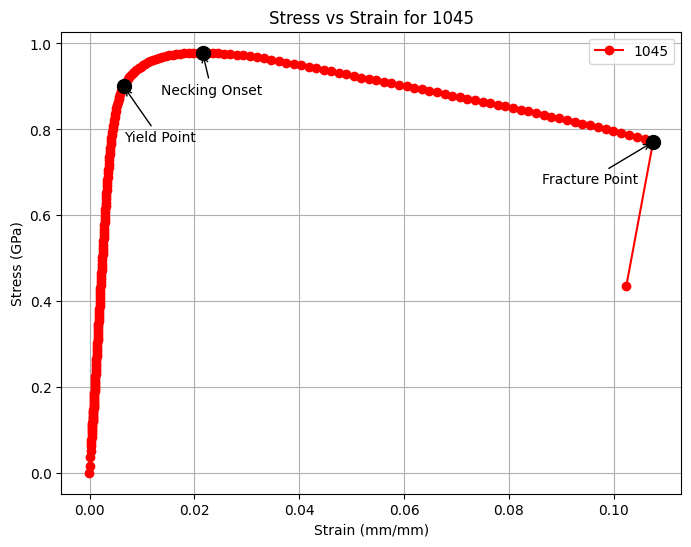

1045
Proportional limit =  (0.003961, 0.757709067888154)
0.2 offset stress =  0.8996489273009599
Ultimate tensile strength =  0.9783501360845157
Fracture strain =  0.1075
Modulus of Elasticity =  200.8193395388275
Plastic strain for 1045 =  0.025164719596778753
New yield stress =  0.9710178170599261


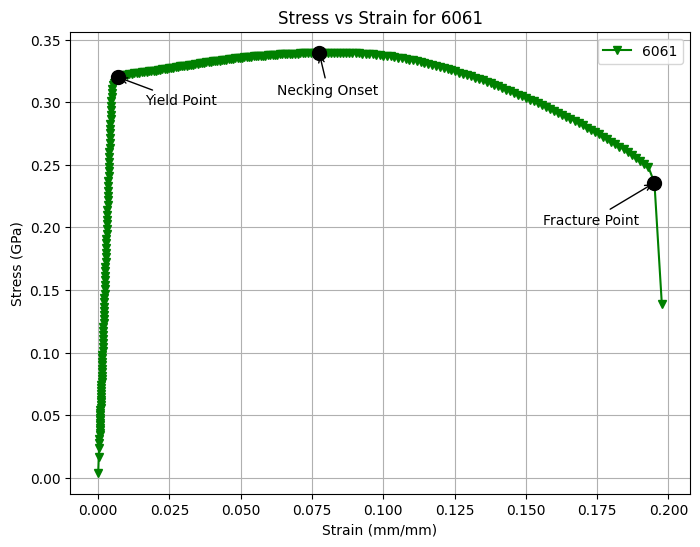

6061
Proportional limit =  (0.005171, 0.31331318837631855)
0.2 offset stress =  0.3201788732980767
Ultimate tensile strength =  0.3394641301724342
Fracture strain =  0.1951
Modulus of Elasticity =  64.42575363874587
Plastic strain for 6061 =  0.024894428157796786
New yield stress =  0.3289303136907021


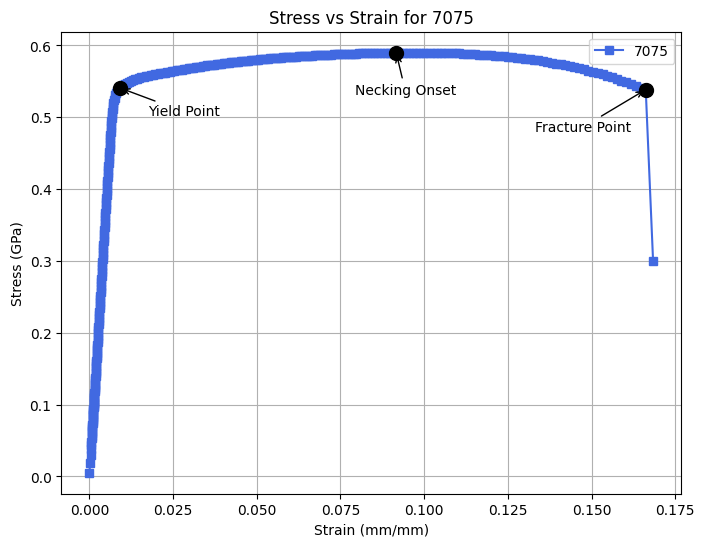

7075
Proportional limit =  (0.0075, 0.5272094171099178)
0.2 offset stress =  0.5408360714110048
Ultimate tensile strength =  0.5898233621348485
Fracture strain =  0.1662
Modulus of Elasticity =  75.3441972020959
Plastic strain for 7075 =  0.02245707122689668
New yield stress =  0.5683159129620596


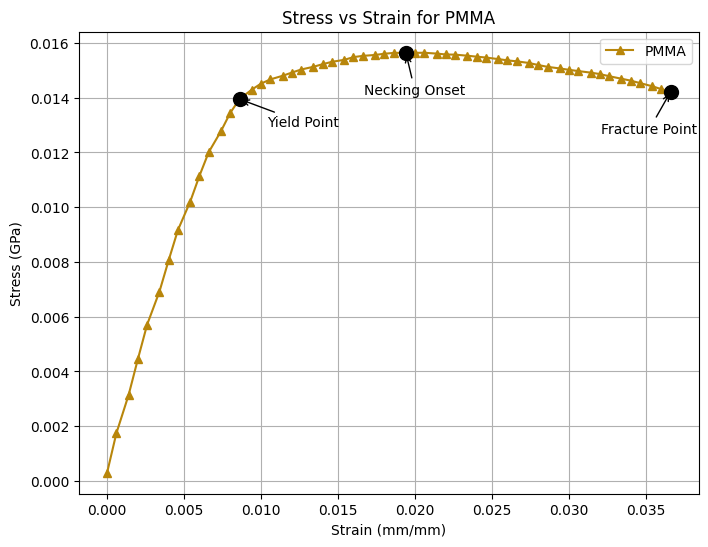

PMMA
Proportional limit =  (0.0074, 0.012784224441071275)
0.2 offset stress =  0.014099483513996387
Ultimate tensile strength =  0.01564645178190754
Fracture strain =  0.0366
Modulus of Elasticity =  2.0315054105976444
Plastic strain for PMMA =  0.022606060391928404
New yield stress =  0.015020828319429668


In [6]:
def find_data(strain, stress, error_tol):
    E_avg = np.abs(stress[1] / strain[1])  # initial slope
    prop_limit_idx = None
    for i in range(2, len(stress)):
        E = (stress[i] - stress[0]) / (strain[i] - strain[0])  # slope
        if (np.abs(E - E_avg) > error_tol) and i > 10:
            prop_limit_idx = i
            break
        else:
            E_avg *= (i - 1)
            E_avg += E
            E_avg /= i
    offset_line = E_avg * (strain - 0.002)
    diff = stress - offset_line
    sign_change = np.where(np.diff(np.sign(diff)))[0]
    i = sign_change[0] if len(sign_change) > 0 else None
    x0, x1 = strain[i], strain[i + 1]
    y0, y1 = diff[i], diff[i + 1]

    yield_strain = x0 - y0 * (x1 - x0) / (y1 - y0)
    yield_stress = np.interp(yield_strain, strain, stress)
    yield_idx = np.argmin(np.abs(strain - yield_strain))
    # Necking onset: maximum stress point
    necking_idx = np.argmax(stress)
    uts = stress[necking_idx]
    return yield_idx, necking_idx, (strain[prop_limit_idx], stress[prop_limit_idx]), yield_stress, uts, E_avg

strain_at_load = 0.03

# For material A02CT1045
yield_idx, necking_idx, prop_limit, yield_stress, uts, E = find_data(strain1045, stress1045, error_tol=10)
plt.figure(figsize=(8, 6))
plt.plot(strain1045, stress1045, label='1045', color='red', marker='o', linestyle='-')

if yield_idx is not None:
    plt.annotate('Yield Point', xy=(strain1045[yield_idx], stress1045[yield_idx]),
                 xytext=(0, -40), textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle="->"))
    plt.scatter(strain1045[yield_idx], stress1045[yield_idx], color='black', s=100, zorder=5)

plt.annotate('Necking Onset', xy=(strain1045[necking_idx], stress1045[necking_idx]),
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain1045[necking_idx], stress1045[necking_idx], color='black', s=100, zorder=5)

plt.annotate('Fracture Point', xy=(strain1045[-2], stress1045[-2]),
             xytext=(-80, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain1045[-2], stress1045[-2], color='black', s=100, zorder=5)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (GPa)')
plt.title('Stress vs Strain for 1045')
plt.legend()
plt.grid(True)
plt.show()
print("1045")
print("Proportional limit = ", prop_limit)
print("0.2 offset stress = ", yield_stress)
print("Ultimate tensile strength = ", uts)
print("Fracture strain = ", strain1045[-2])
print("Modulus of Elasticity = ", E)

stress_at_load_1045 = np.interp(strain_at_load, strain1045, stress1045)
elastic_recovery = stress_at_load_1045 / E
strain_plastic_1045 = strain_at_load - elastic_recovery
print("Plastic strain for 1045 = ", strain_plastic_1045)
print("New yield stress = ", stress_at_load_1045)


# For material A02CT6061
yield_idx, necking_idx, prop_limit, yield_stress, uts, E = find_data(strain6061, stress6061, error_tol=4)
plt.figure(figsize=(8, 6))
plt.plot(strain6061, stress6061, label='6061', color='green', marker='v', linestyle='-')
if yield_idx is not None:
    plt.annotate('Yield Point', xy=(strain6061[yield_idx], stress6061[yield_idx]),
                 xytext=(20, -20), textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle="->"))
    plt.scatter(strain6061[yield_idx], stress6061[yield_idx], color='black', s=100, zorder=5)
plt.annotate('Necking Onset', xy=(strain6061[necking_idx], stress6061[necking_idx]),
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain6061[necking_idx], stress6061[necking_idx], color='black', s=100, zorder=5)
plt.annotate('Fracture Point', xy=(strain6061[-2], stress6061[-2]),
             xytext=(-80, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain6061[-2], stress6061[-2], color='black', s=100, zorder=5)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (GPa)')
plt.title('Stress vs Strain for 6061')
plt.legend()
plt.grid(True)
plt.show()
print("6061")
print("Proportional limit = ", prop_limit)
print("0.2 offset stress = ", yield_stress)
print("Ultimate tensile strength = ", uts)
print("Fracture strain = ", strain6061[-2])
print("Modulus of Elasticity = ", E)

stress_at_load_6061 = np.interp(strain_at_load, strain6061, stress6061)
elastic_recovery = stress_at_load_6061 / E
strain_plastic_6061 = strain_at_load - elastic_recovery
print("Plastic strain for 6061 = ", strain_plastic_6061)
print("New yield stress = ", stress_at_load_6061)


# For material A02CT7075
yield_idx, necking_idx, prop_limit, yield_stress, uts, E = find_data(strain7075, stress7075, error_tol=5)
plt.figure(figsize=(8, 6))
plt.plot(strain7075, stress7075, label='7075', color='royalblue', marker='s', linestyle='-')
if yield_idx is not None:
    plt.annotate('Yield Point', xy=(strain7075[yield_idx], stress7075[yield_idx]),
                 xytext=(20, -20), textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle="->"))
    plt.scatter(strain7075[yield_idx], stress7075[yield_idx], color='black', s=100, zorder=5)
plt.annotate('Necking Onset', xy=(strain7075[necking_idx], stress7075[necking_idx]),
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain7075[necking_idx], stress7075[necking_idx], color='black', s=100, zorder=5)
plt.annotate('Fracture Point', xy=(strain7075[-2], stress7075[-2]),
             xytext=(-80, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strain7075[-2], stress7075[-2], color='black', s=100, zorder=5)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (GPa)')
plt.title('Stress vs Strain for 7075')
plt.legend()
plt.grid(True)
plt.show()
print("7075")
print("Proportional limit = ", prop_limit)
print("0.2 offset stress = ", yield_stress)
print("Ultimate tensile strength = ", uts)
print("Fracture strain = ", strain7075[-2])
print("Modulus of Elasticity = ", E)

stress_at_load_7075 = np.interp(strain_at_load, strain7075, stress7075)
elastic_recovery = stress_at_load_7075 / E
strain_plastic_7075 = strain_at_load - elastic_recovery
print("Plastic strain for 7075 = ", strain_plastic_7075)
print("New yield stress = ", stress_at_load_7075)


# For material A02CTPMMA
yield_idx, necking_idx, prop_limit, yield_stress, uts, E = find_data(strainPMMA, stressPMMA, error_tol=0.15)
plt.figure(figsize=(8, 6))
plt.plot(strainPMMA, stressPMMA, label='PMMA', color='darkgoldenrod', marker='^', linestyle='-')
if yield_idx is not None:
    plt.annotate('Yield Point', xy=(strainPMMA[yield_idx], stressPMMA[yield_idx]),
                 xytext=(20, -20), textcoords='offset points',
                 arrowprops=dict(facecolor='black', arrowstyle="->"))
    plt.scatter(strainPMMA[yield_idx], stressPMMA[yield_idx], color='black', s=100, zorder=5)
plt.annotate('Necking Onset', xy=(strainPMMA[necking_idx], stressPMMA[necking_idx]),
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strainPMMA[necking_idx], stressPMMA[necking_idx], color='black', s=100, zorder=5)
plt.annotate('Fracture Point', xy=(strainPMMA[-1], stressPMMA[-1]),
             xytext=(-50, -30), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.scatter(strainPMMA[-1], stressPMMA[-1], color='black', s=100, zorder=5)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (GPa)')
plt.title('Stress vs Strain for PMMA')
plt.legend()
plt.grid(True)
plt.show()
print("PMMA")
print("Proportional limit = ", prop_limit)
print("0.2 offset stress = ", yield_stress)
print("Ultimate tensile strength = ", uts)
print("Fracture strain = ", strainPMMA[-1])
print("Modulus of Elasticity = ", E)

stress_at_load_PMMA = np.interp(strain_at_load, strainPMMA, stressPMMA)
elastic_recovery = stress_at_load_PMMA / E
strain_plastic_PMMA = strain_at_load - elastic_recovery
print("Plastic strain for PMMA = ", strain_plastic_PMMA)
print("New yield stress = ", stress_at_load_PMMA)
